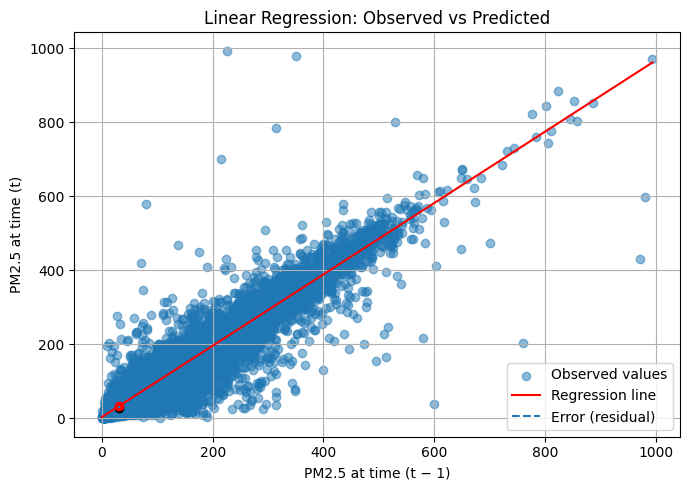

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use ONE lag for clean visualization
X = df["pm2.5"].shift(1).dropna().values.reshape(-1, 1)
y = df["pm2.5"].iloc[1:].values

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Predictions for line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = lr.predict(x_line)

# Pick one sample to show residual
idx = len(X) // 2
x_point = X[idx][0]
y_actual = y[idx]
y_pred = lr.predict([[x_point]])[0]

# Plot
plt.figure(figsize=(7,5))

# Scatter points
plt.scatter(X, y, alpha=0.5, label="Observed values")

# Regression line
plt.plot(x_line, y_line, color="red", label="Regression line")

# Residual (error)
plt.vlines(
    x_point,
    y_pred,
    y_actual,
    linestyles="dashed",
    label="Error (residual)"
)

plt.scatter(x_point, y_actual, color="black")
plt.scatter(x_point, y_pred, color="red")

plt.xlabel("PM2.5 at time (t − 1)")
plt.ylabel("PM2.5 at time (t)")
plt.title("Linear Regression: Observed vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
